In [2]:
#!pip install stable-baselines3[extra]

In [ ]:
#!pip install gymnasium[classic-control]

In [4]:
import gymnasium as gym
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

env = gym.make("CartPole-v1", render_mode="rgb_array")

Timesteps taken: 50
Total Reward: 0


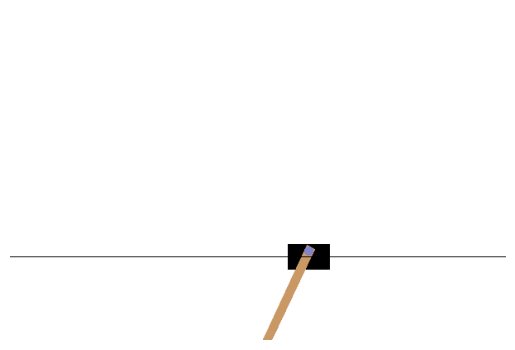

In [7]:
# 1.- Vamos a ejecutar una estrategia con acciones escogidas al azar.
#env.s = 328  # set environment to illustration's state
import time
epochs = 0
penalties, reward = 0, 0
G = 0
frames = [] # for animation
done = False
observation, info = env.reset(seed=42)
#while not done:
for i in range(50):

    frame = env.render()

    # Show frame inline in Jupyter
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())              # Show current figure
    clear_output(wait=True)        # Clear previous output
    action = env.action_space.sample() # muestreamos una acción al azar
    state, reward, done, truncated,info = env.step(action) # ejecutamos dicha acción en nuestro entorno.
    
    G += reward
    epochs += 1

    
print("Timesteps taken: {}".format(epochs))
print("Total Reward: {}".format(penalties))

In [9]:
from stable_baselines3 import PPO
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=25000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 25.7     |
|    ep_rew_mean     | 25.7     |
| time/              |          |
|    fps             | 5567     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 27          |
|    ep_rew_mean          | 27          |
| time/                   |             |
|    fps                  | 3221        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.007944772 |
|    clip_fraction        | 0.0958      |
|    clip_range           | 0.2         |
|    entropy_loss   

Timesteps taken: 150
Total Reward: 0


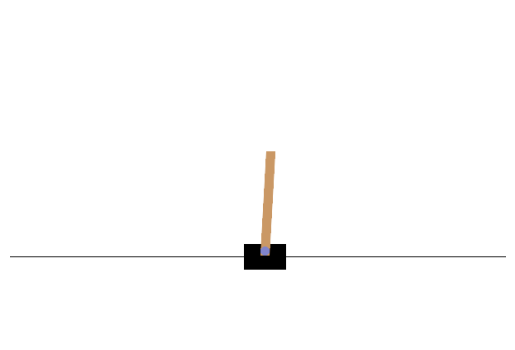

In [11]:

import time
epochs = 0
penalties, reward = 0, 0
G = 0
frames = [] # for animation
done = False
observation, info = env.reset(seed=42)
#while not done:
for i in range(150):

    frame = env.render()

    # Show frame inline in Jupyter
    plt.imshow(frame)
    plt.axis("off")
    display(plt.gcf())              # Show current figure
    clear_output(wait=True)        # Clear previous output
    action, _states = model.predict(state)
    state, reward, done, truncated,info = env.step(action) # ejecutamos dicha acción en nuestro entorno.
    
    G += reward
    epochs += 1

    
print("Timesteps taken: {}".format(epochs))
print("Total Reward: {}".format(penalties))